<a href="https://colab.research.google.com/github/umbertogagl97/Tesi/blob/main/Richieste_prof/random_ROI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librerie

In [1]:
#Librerie

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
#import time
#import os
#import shutil
#import copy

import pandas as pd
import matplotlib.pyplot as plt
import sys

from torchvision.transforms.functional import InterpolationMode

from torch.utils.data import TensorDataset, DataLoader

import cv2
from google.colab.patches import cv2_imshow

from typing import Optional

#mask

In [2]:
def compute_mask(img,dim_contours=10,n_rect=2):
  '''
  img: tensor 1x3xnxm
  dim_contours: larghezza dei contorni da tracciare (consigliati 10 in generale e 8 per Latex)
  n_rect: dimensione rect di getStructuringElement (consigliata 2 in generale e 1 per Latex)
  '''
  #img iniziale [0,1]
  img=np.array(img[0])
  img=img.transpose(1,2,0)

  #trasforma in gray
  r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  #scala in [0,255]
  gray = (gray - np.min(gray)) / (np.max(gray) - np.min(gray))
  gray=gray*255
  gray=gray.astype('uint8')
  #cv2_imshow(gray)
  #calcola immagine binaria
  ret, imgf = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # Morph open to remove noise
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (n_rect,n_rect))
  imgf = cv2.morphologyEx(imgf, cv2.MORPH_OPEN, kernel, iterations=1)
  #cv2_imshow(imgf)
  image_contours = np.zeros((imgf.shape[0],
                            imgf.shape[1]),
                            np.uint8)

  image_binary = np.zeros((imgf.shape[0],
                          imgf.shape[1]),
                          np.uint8)

  #cerca i contorni nell'immagine binaria
  contours =cv2.findContours(imgf, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

  cv2.drawContours(image_contours,
                      contours, -1,
                      (255,255), dim_contours) 
  

  #image_contours=cv2.GaussianBlur(image_contours, (3,3), 0)
  #cv2_imshow(image_contours)
  contours = cv2.findContours(image_contours, cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)[0]
  #disegna solo il contorno più esterno
  cv2.drawContours(image_binary, [max(contours, key = cv2.contourArea)],
                  -1, (255, 255),-1)
  #cv2_imshow(image_binary)
  #restituisce immagine [0,1]
  return image_binary/255

#read image and compute mask

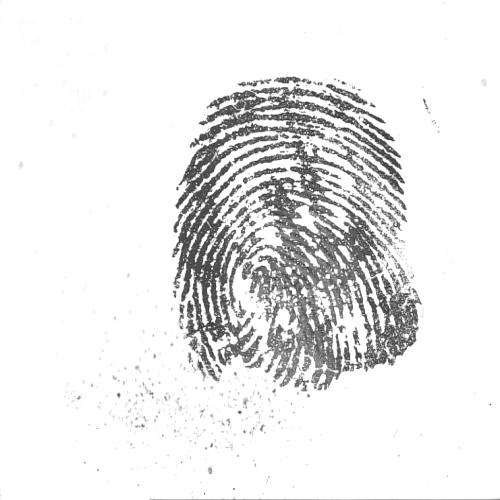

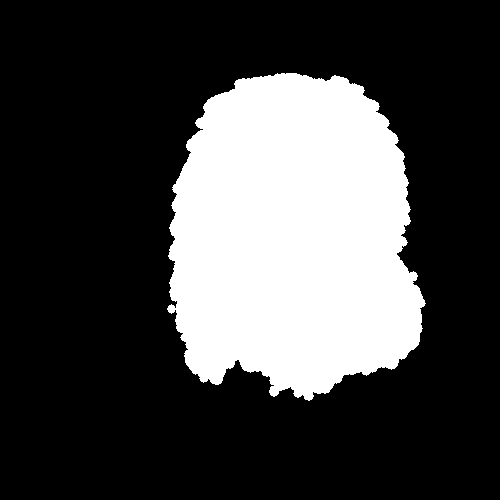

In [245]:
img=cv2.imread('img.png')
img=img/255
cv2_imshow(img*255)
img_c=torch.Tensor(img.transpose(2,0,1)).unsqueeze_(0)
m=compute_mask(img_c,8,1)
cv2_imshow(m*255)

#compute radius of mask

center

In [246]:
from scipy import ndimage
center=ndimage.measurements.center_of_mass(m)
center=(int(center[0]),int(center[1]))
print(center)

(236, 292)


In [247]:
print(m[center])

1.0


maximum position

In [248]:
radius=ndimage.measurements.maximum_position(m)
radius=(int(radius[0]),int(radius[1]))
print(radius)

(73, 277)


radius

In [249]:
from scipy.spatial import distance
d=int(distance.euclidean(center,radius))
print(d)

163


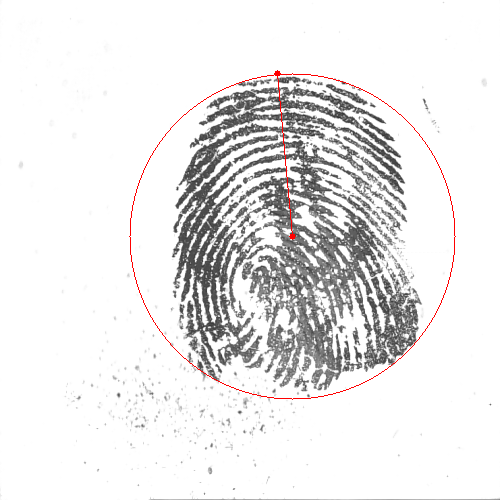

In [250]:
img_test=img.copy()
img_test=cv2.circle(img_test,(center[1],center[0]),3,(0,0,255),-1)
img_test=cv2.circle(img_test,(radius[1],radius[0]),3,(0,0,255),-1)
img_test=cv2.circle(img_test,(center[1],center[0]),d,(0,0,255),1)
img_test=cv2.line(img_test,(center[1],center[0]),(radius[1],radius[0]),(0,0,255))
#img_test[center,:]=[0,0,1]
cv2_imshow(img_test*255)

#random circle mask

[230 174]


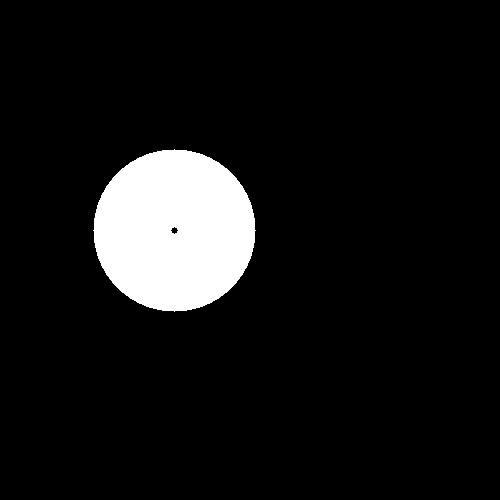

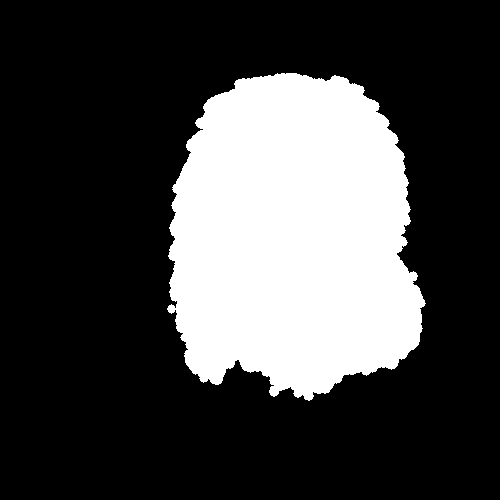

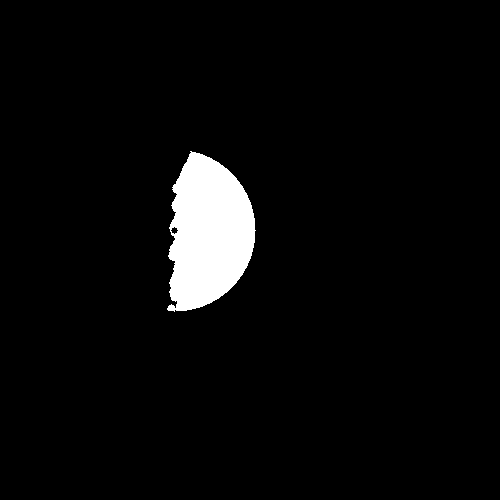

In [282]:
#rand_cent=np.random.randint(500, size=2)
f=np.argwhere(m==1)
rand_cent=f[np.random.randint(0,f.shape[0],1)][0]

print(rand_cent)
black_img=np.zeros([500,500])
random_roi=cv2.circle(black_img,(rand_cent[1],rand_cent[0]),int(d/2),255,-1)
random_roi=cv2.circle(random_roi,(rand_cent[1],rand_cent[0]),3,0,-1)
cv2_imshow(random_roi*255)
cv2_imshow(m*255)
random_roi*=m
if cv2.countNonZero(random_roi) == 0:
    print("Image is black")
    random_roi=m.copy()
cv2_imshow(random_roi*255)

In [ ]:
'''
for i in range(3):
  img_test[:,:,i]=np.where(random_roi==0,0,img_test[:,:,i])
cv2_imshow(img_test*255)
'''